In [1]:
from skimage import restoration, util, filters, transform
from skimage.morphology import disk
import cv2
from os import path
from glob import glob
import zarr
from matplotlib import pyplot as plt
import numpy as np

In [2]:
testimg_path="/mnt/showers2/TEMPORARY/Fukai-ImageAnalysis/LSM800-2021-04-23-timelapse/210423-HL60-atRA2-live1-01-1.czi/210423-HL60-atRA2-live1-01-1_AcquisitionBlock1.czi/210423-HL60-atRA2-live1-01-1_AcquisitionBlock1_pt1_analyzed/rescaled_images/rescaled_image_divide/"

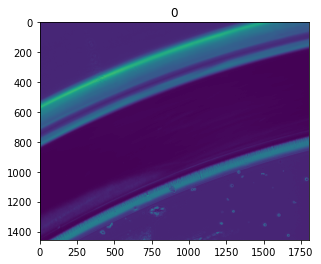

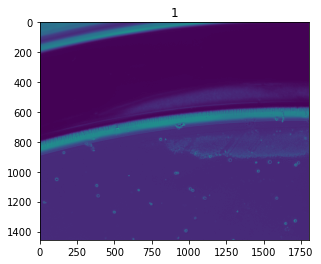

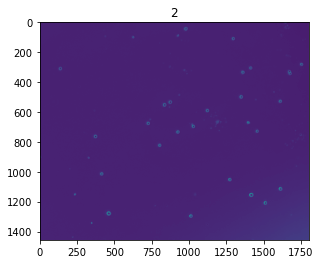

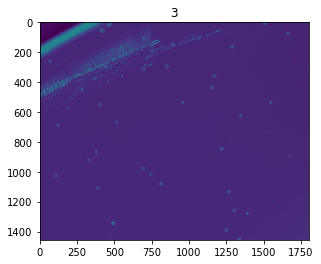

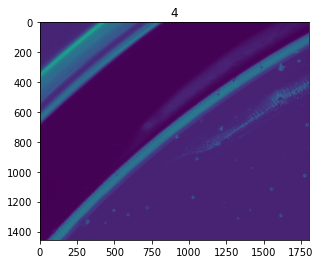

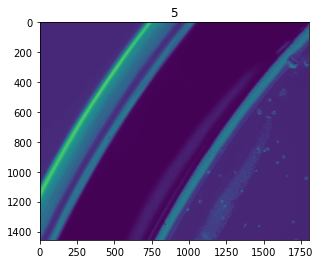

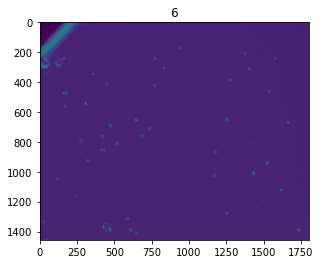

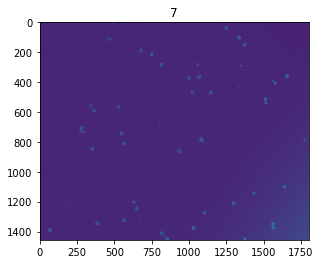

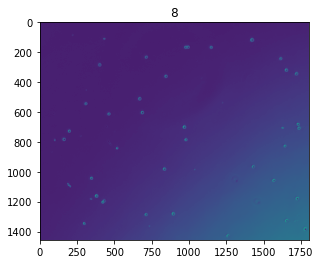

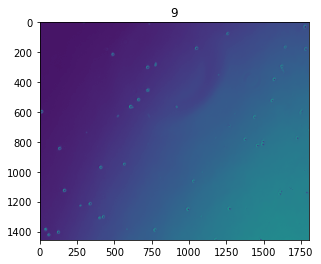

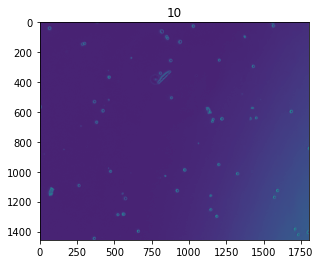

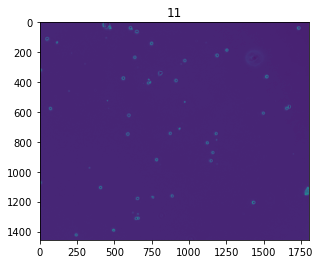

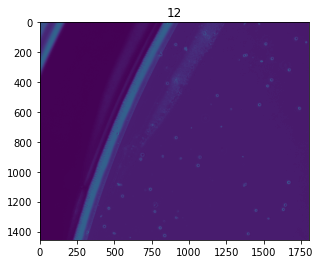

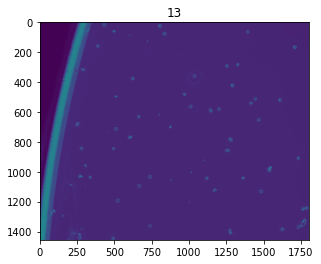

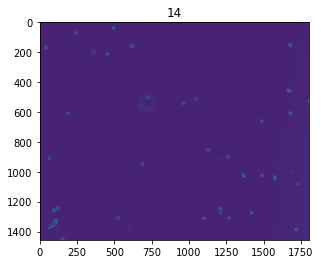

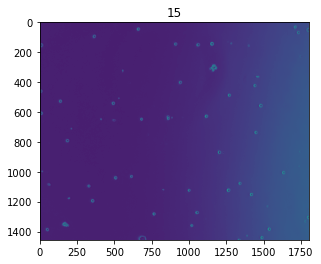

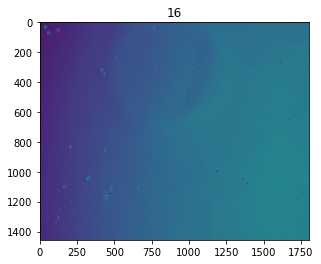

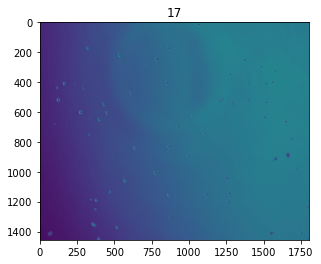

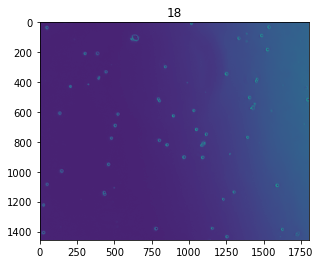

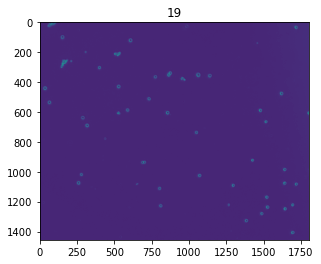

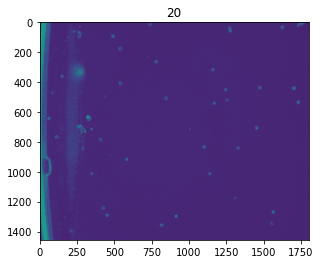

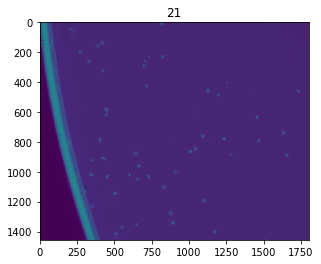

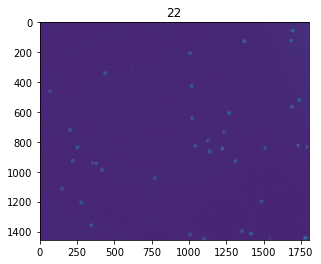

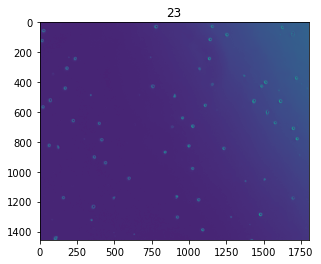

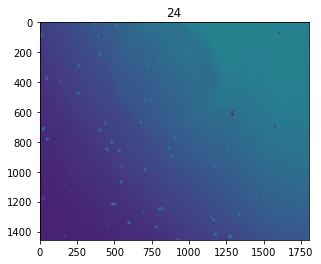

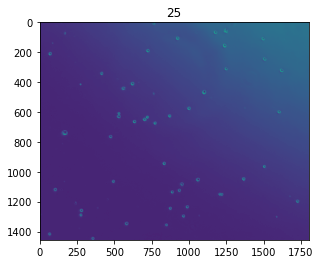

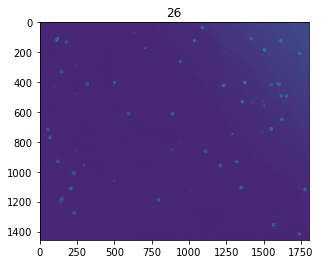

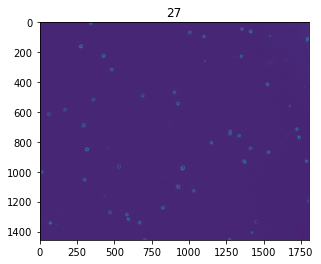

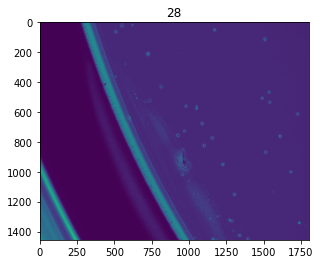

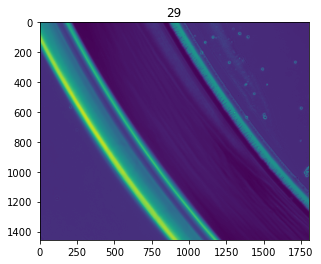

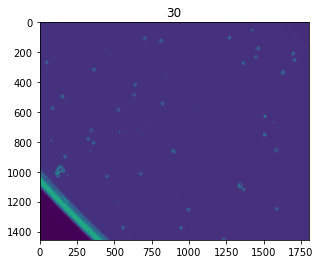

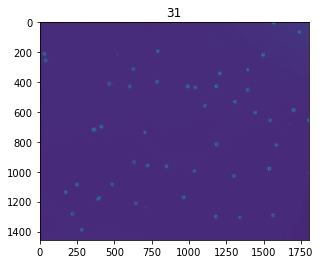

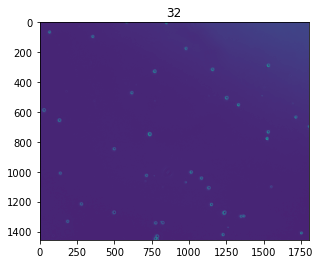

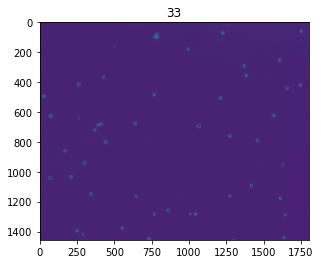

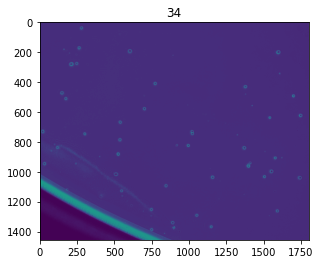

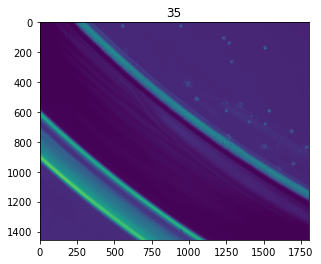

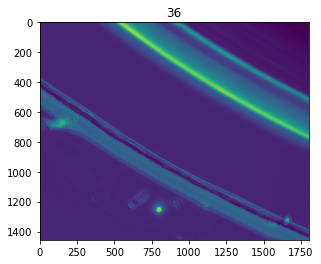

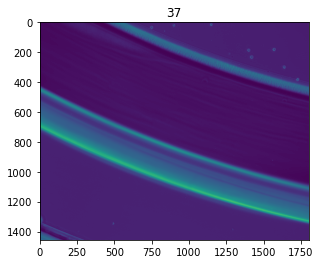

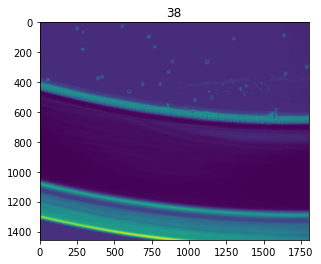

In [3]:
files=glob(path.join(testimg_path,"*.zarr"))
imgs=[]
for j,f in enumerate(files):
    img=zarr.open(f,"r")[0,...]
    imgs.append(img)
    plt.imshow(img[0,0])
    plt.title(j)
    plt.show()
    plt.close("all")

In [4]:
candidate_indices=[1,17]

In [5]:
testimgs=np.array(imgs)[candidate_indices,0,0,...]

In [6]:
testimgs.shape

(2, 1456, 1800)

In [ ]:
pixel_size=

In [18]:
img=testimgs[1]
img_small=transform.rescale(img,0.05,preserve_range=True,)
img_small_bg=filters.median(img_small,disk(5))

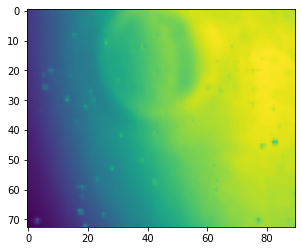

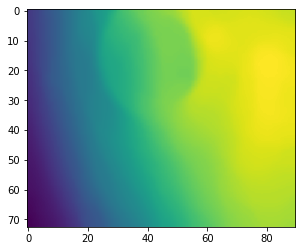

In [19]:
plt.imshow(img_small)
plt.show()
plt.imshow(img_small_bg)

In [21]:
img_bg=transform.resize(img_small_bg,img.shape,preserve_range=True)

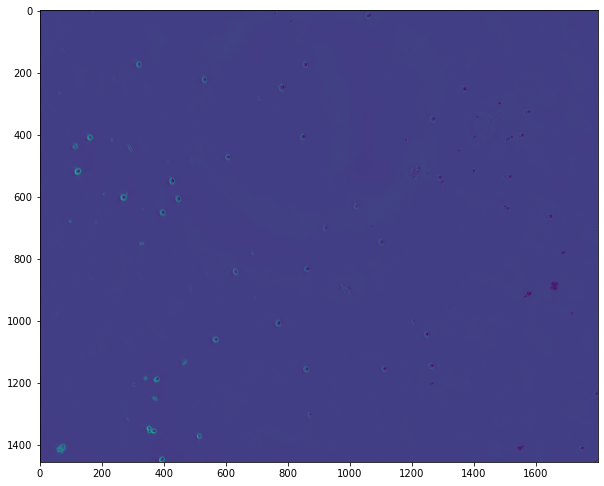

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(img/img_bg)

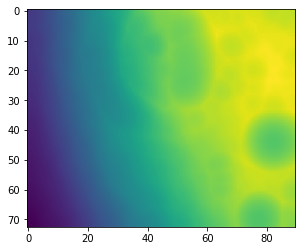

In [14]:
img2=restoration.rolling_ball(img_small,radius=100)
plt.imshow(img2)

In [23]:
testimg2=(testimg-testimg.min())/(testimg.max()-testimg.min())
img=util.img_as_uint(testimg2)

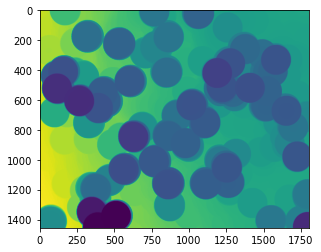

In [27]:
img2=restoration.rolling_ball(util.invert(img),radius=100)
plt.imshow(img2)

In [ ]:
img2=filters.median(img,disk(100),mode="nearest",)

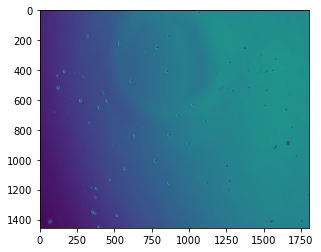

In [30]:
plt.imshow(img2)

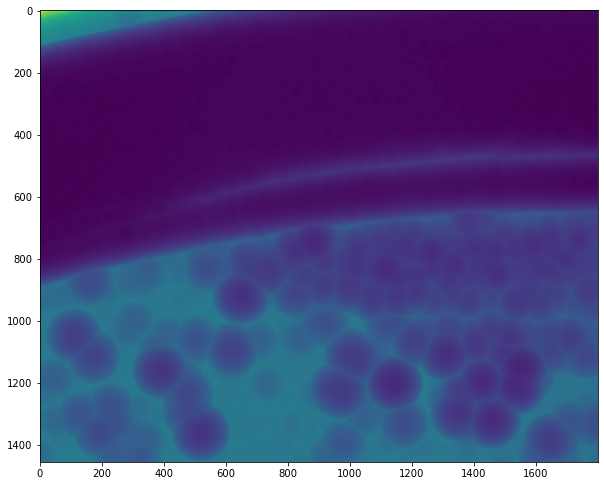

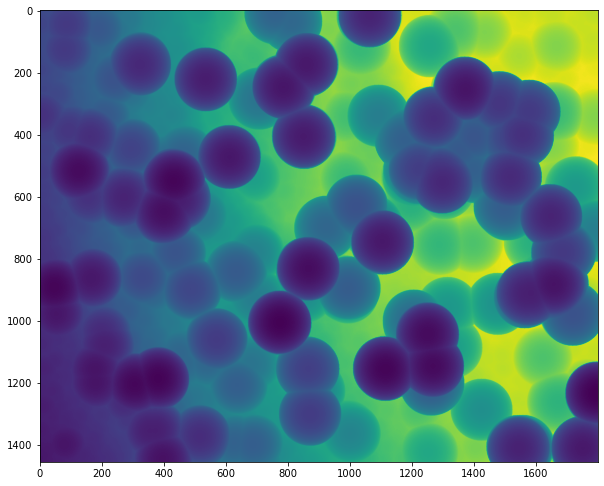

In [12]:
radius=100.
normalized_radius = radius / 255
kernel = restoration.ellipsoid_kernel(
    (radius * 2, radius * 2),
    normalized_radius * 2
)
for testimg in testimgs:
    testimg2=restoration.rolling_ball(testimg,kernel=kernel)
    plt.figure(figsize=(10,10))
    plt.imshow(testimg2)
    plt.show()